AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [2]:
import pandas as pd

df = pd.read_csv('titanic.csv')

first_10_rows = df.head(10)

last_20_rows = df.tail(20)

info = df.info()

description = df.describe(include='all')

pd.set_option('display.max_columns', None)
print("First 10 Rows:")
print(first_10_rows)
print("\nLast 20 Rows:")
print(last_20_rows)
print("\nDataset Information:")
print(info)
print("\nDataset Description:")
print(description)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 83.7+ KB
First 10 Rows:
   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   
5            6     

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column



Missing Values in Each Column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


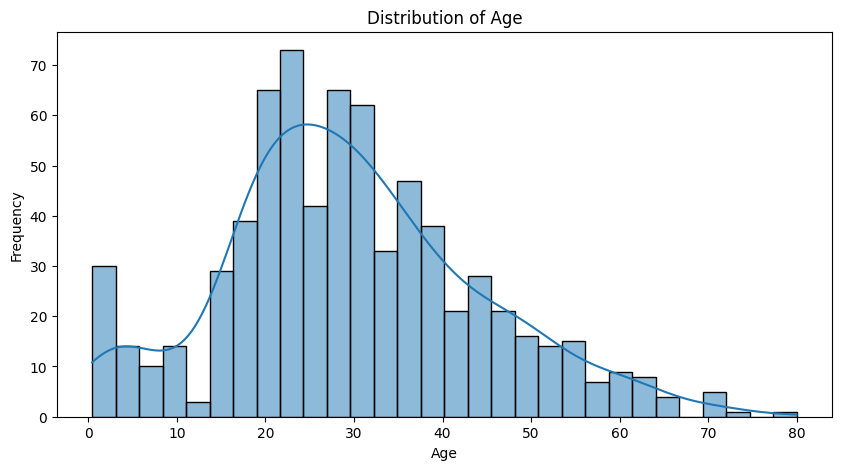

C:\Users\12814\AppData\Local\Temp\ipykernel_13544\54620001.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_median, inplace=True)
C:\Users\12814\AppData\Local\Temp\ipykernel_13544\54620001.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)

plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

age_median = df['Age'].median()

df['Age'].fillna(age_median, inplace=True)

df['HasCabin'] = df['Cabin'].notnull().astype(int)

embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)

df['Survived'] = df['Survived'].apply(lambda x: 1 if x == 1 else 0)

df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
fare_median = df['Fare'].median()
df['Fare'].fillna(fare_median, inplace=True)


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot


Average Fare by Pclass:
 Pclass
1    83.687751
2    20.528782
3    13.690291
Name: Fare, dtype: float64


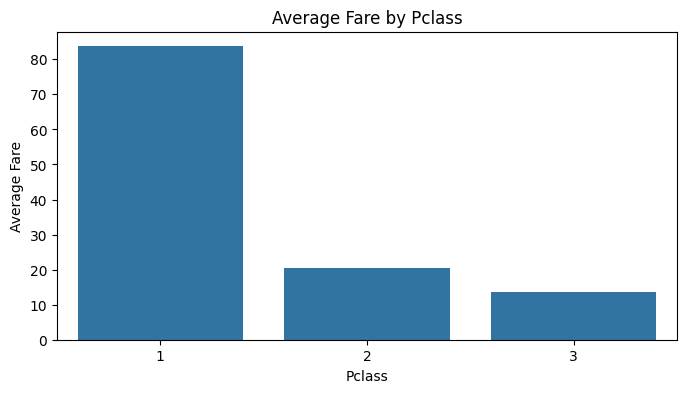


Average Fare by Sex:
 Sex
female    44.265872
male      25.435527
Name: Fare, dtype: float64


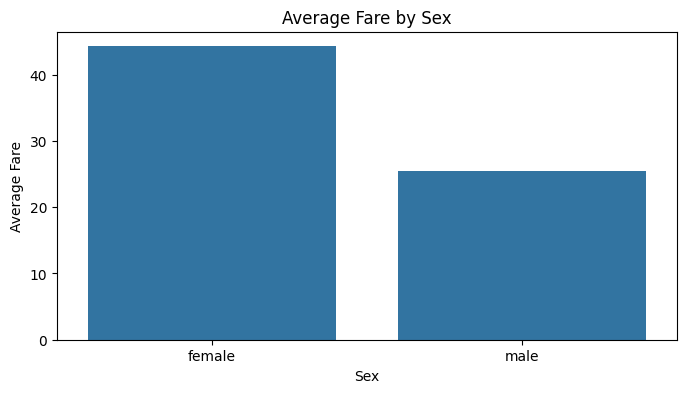

In [6]:
avg_fare_by_pclass = df.groupby('Pclass')['Fare'].mean()
print("\nAverage Fare by Pclass:\n", avg_fare_by_pclass)

plt.figure(figsize=(8, 4))
sns.barplot(x=avg_fare_by_pclass.index, y=avg_fare_by_pclass.values)
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.show()

avg_fare_by_sex = df.groupby('Sex')['Fare'].mean()
print("\nAverage Fare by Sex:\n", avg_fare_by_sex)

plt.figure(figsize=(8, 4))
sns.barplot(x=avg_fare_by_sex.index, y=avg_fare_by_sex.values)
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.show()


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

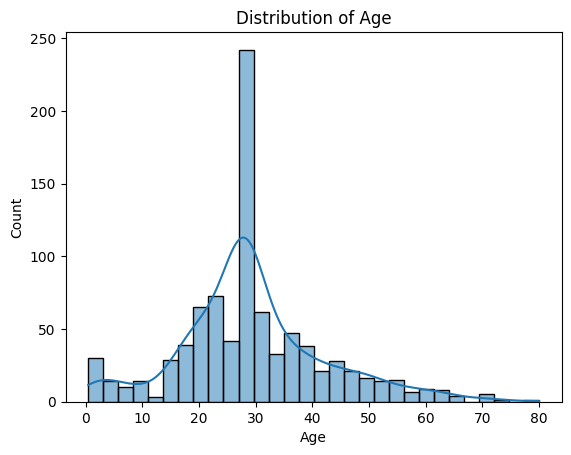

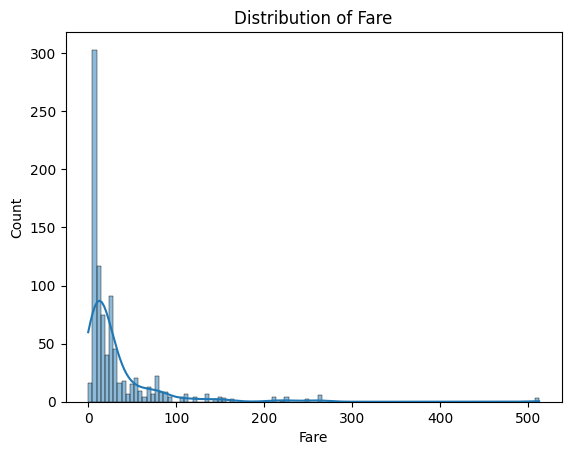

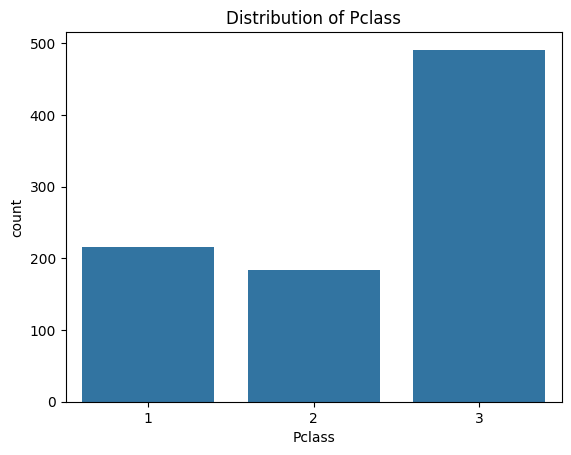

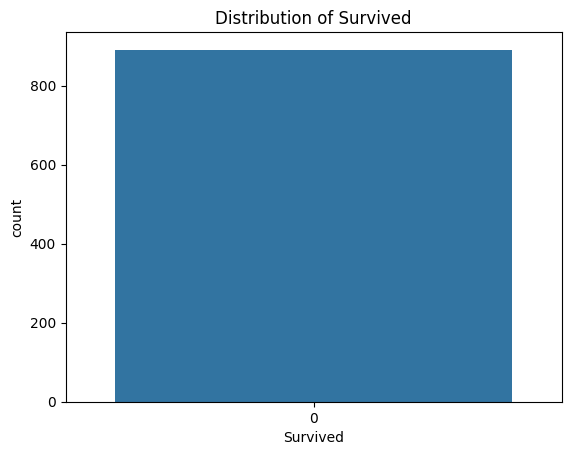

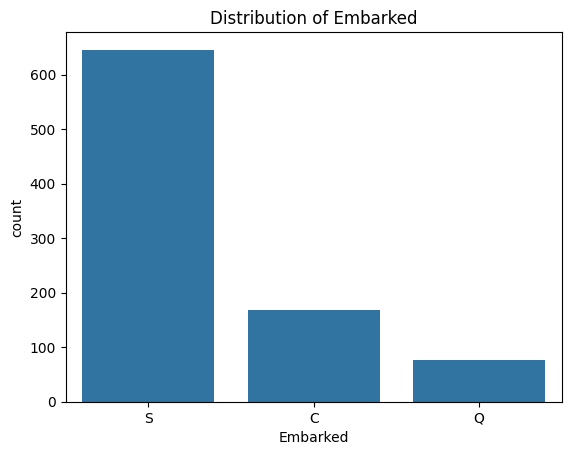

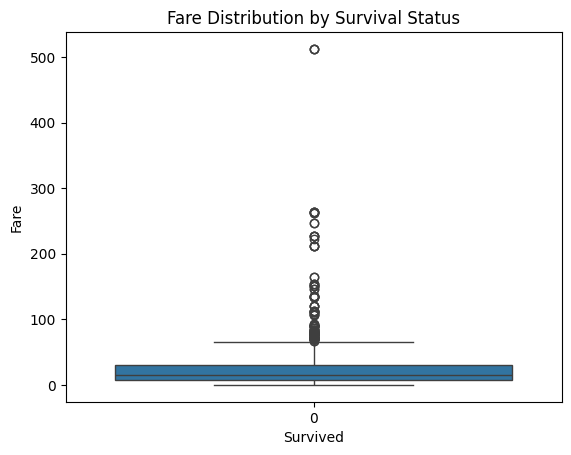

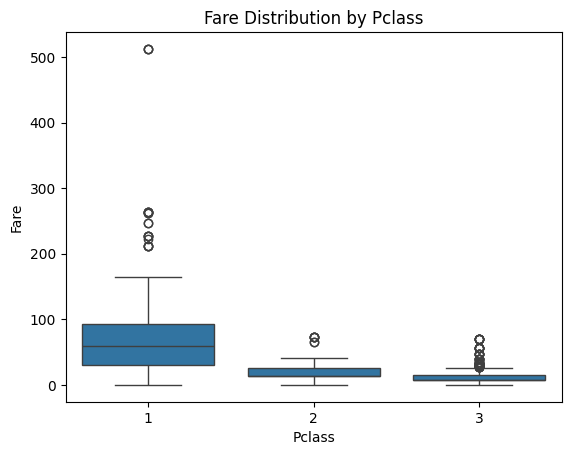

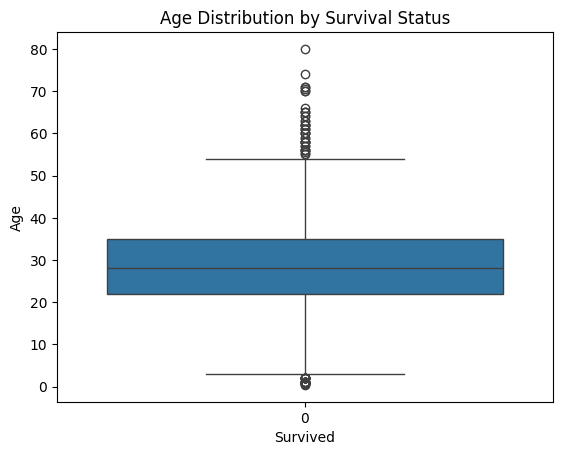

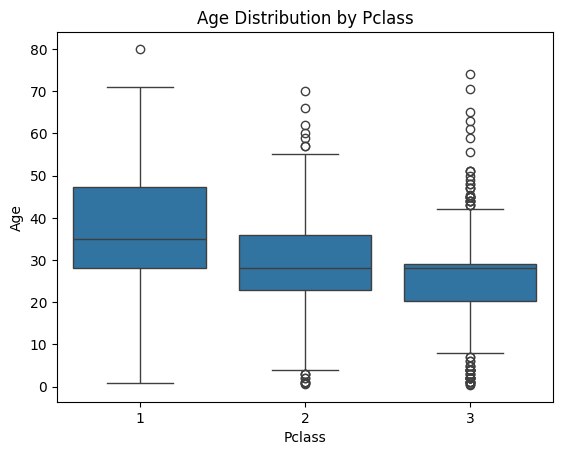

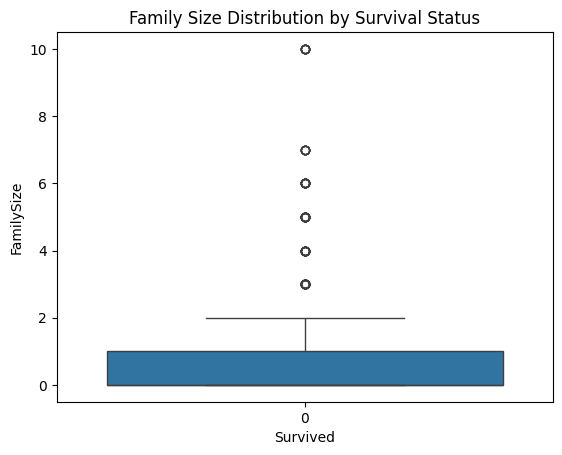

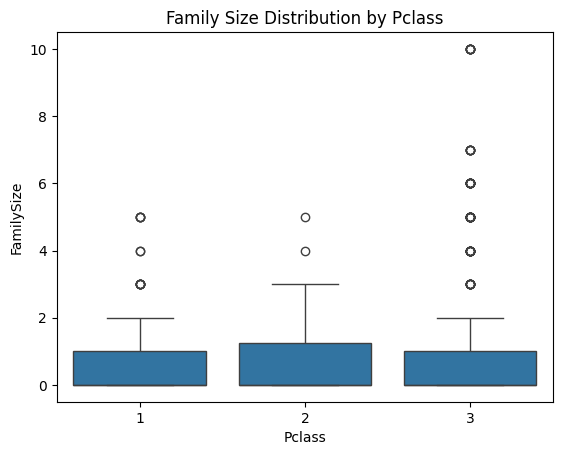

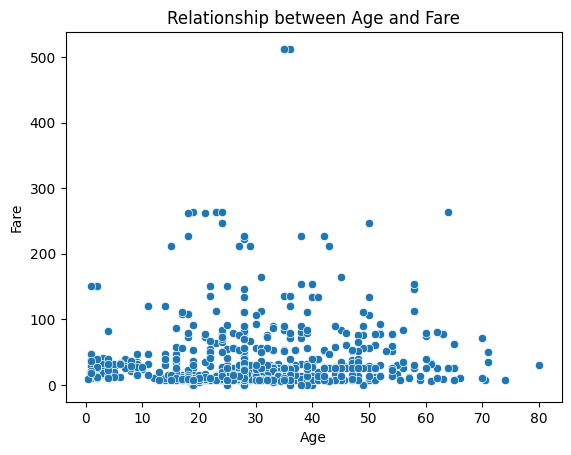

In [7]:
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

sns.histplot(df['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Pclass')
plt.show()

sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survived')
plt.show()

sns.countplot(x='Embarked', data=df)
plt.title('Distribution of Embarked')
plt.show()

sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival Status')
plt.show()

sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Pclass')
plt.show()

sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival Status')
plt.show()

sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Pclass')
plt.show()

df['FamilySize'] = df['SibSp'] + df['Parch']
sns.boxplot(x='Survived', y='FamilySize', data=df)
plt.title('Family Size Distribution by Survival Status')
plt.show()

sns.boxplot(x='Pclass', y='FamilySize', data=df)
plt.title('Family Size Distribution by Pclass')
plt.show()

sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Relationship between Age and Fare')
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

In [9]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

age_fare_corr = numeric_df['Age'].corr(numeric_df['Fare'])
print("\nCorrelation between Age and Fare:", age_fare_corr)
0
strong_correlations = correlation_matrix[(correlation_matrix.abs() > 0.5) & (correlation_matrix != 1)]
print("\nStrong Correlations:\n", strong_correlations)



Correlation Matrix:
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000       NaN -0.035144  0.034212 -0.057527 -0.001652   
Survived             NaN       NaN       NaN       NaN       NaN       NaN   
Pclass         -0.035144       NaN  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212       NaN -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527       NaN  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652       NaN  0.018443 -0.172482  0.414838  1.000000   
Fare            0.013986       NaN -0.545853  0.098174  0.159989  0.216906   
HasCabin        0.019919       NaN -0.725541  0.240314 -0.040460  0.036987   
FamilySize     -0.040143       NaN  0.065997 -0.245619  0.890712  0.783111   

                 Fare  HasCabin  FamilySize  
PassengerId  0.013986  0.019919   -0.040143  
Survived          NaN       NaN         NaN  
Pclass      -0.545853 -0.725541    0.065997  
Age          